In [1]:
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv('../Web Scripe/Output/Q2-2018_Single_Family_Data_Machine_Learning.csv')
housing.head()

,Bath,Bed,City,Half-bath,House_type,Listing_type,Price,Square_Feet,State,Street,Zip_code
0,5,5,Laguna Beach,1,Single Family,FOR SALE,"$26,500,000","6,109",CA,92 Emerald Bay,92651
1,5,5,Newport Beach,1,Single Family,FOR SALE,"$23,950,000","7,168",CA,3619 Ocean Boulevard,92625
2,5,5,Corona del Mar,1,Single Family,FOR SALE,"$23,950,000","7,168",CA,3619 Ocean Boulevard,92625
3,4,5,Malibu,1,Single Family,FOR SALE,"$23,900,000","6,100",CA,27242 Pacific Coast Hwy,90265
4,4,4,Newport Beach,2,Single Family,FOR SALE,"$23,888,000","4,000",CA,1752 E Oceanfront,92661


In [3]:
def get_outliners(housing, outliers_fraction=0.25):
    clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1)
    clf.fit(housing)
    result = clf.predict(housing)
    return result

In [4]:
#training_dataset = housing[get_outliners(housing[Price], 0.15)==1]

In [5]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = housing[['Bath', 'Bed', 'City', 'Half-bath', 'House_type', 'Listing_type', 'Square_Feet', 'State', 'Street', 'Zip_code']]
#y = housing["Price"].values.reshape(-1, 1)
#print(X.shape, y.shape)
### END SOLUTION

In [6]:
housing.head()

,Bath,Bed,City,Half-bath,House_type,Listing_type,Price,Square_Feet,State,Street,Zip_code
0,5,5,Laguna Beach,1,Single Family,FOR SALE,"$26,500,000","6,109",CA,92 Emerald Bay,92651
1,5,5,Newport Beach,1,Single Family,FOR SALE,"$23,950,000","7,168",CA,3619 Ocean Boulevard,92625
2,5,5,Corona del Mar,1,Single Family,FOR SALE,"$23,950,000","7,168",CA,3619 Ocean Boulevard,92625
3,4,5,Malibu,1,Single Family,FOR SALE,"$23,900,000","6,100",CA,27242 Pacific Coast Hwy,90265
4,4,4,Newport Beach,2,Single Family,FOR SALE,"$23,888,000","4,000",CA,1752 E Oceanfront,92661


In [7]:
type(housing.loc[0, 'Square_Feet'])

str

In [8]:
housing.loc[0, 'Square_Feet']

'6,109'

In [9]:
housing["Square_Feet"]= housing["Square_Feet"].apply(lambda x: x.replace(",",""))

In [10]:
housing["Price"]= housing["Price"].apply(lambda x: x.replace(",",""))
housing["Price"]= housing["Price"].apply(lambda x: x.replace("$",""))

In [11]:
housing["Square_Feet"]= housing["Square_Feet"].apply(pd.to_numeric)

In [12]:
housing["Price"]= housing["Price"].apply(pd.to_numeric)

In [13]:
type(housing["Square_Feet"][0])

numpy.int64

In [14]:
type(housing["Price"][0])

numpy.int64

In [15]:
numeric_cols = housing.columns[housing.dtypes.eq('str')]
numeric_cols = ['Square_Feet']
housing[numeric_cols] = housing[numeric_cols].apply(pd.to_numeric)

In [16]:
#housing.Square_Feet= pd.to_numeric(housing.Square_Feet, errors='coerce')

In [17]:
#float(housing.loc[0, 'Square_Feet'])

In [18]:
#housing.loc[0, 'Square_Feet']

In [19]:
housing.dtypes

Bath             int64
Bed              int64
City            object
Half-bath        int64
House_type      object
Listing_type    object
Price            int64
Square_Feet      int64
State           object
Street          object
Zip_code         int64
dtype: object

In [20]:
X = housing[['Bath', 'Bed', 'Half-bath', 'Square_Feet', 'Zip_code']]
y = housing["Price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8861, 5) (8861, 1)


In [21]:
#***Test2
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [22]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\hongk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION 

C:\Users\hongk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

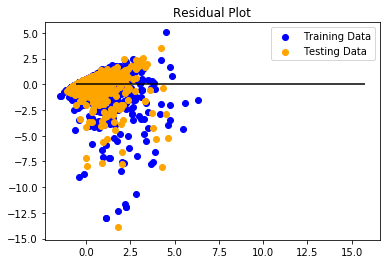

In [25]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [26]:
!python --version

Python 3.6.4


In [27]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

#print(f"MSE: {MSE}, R2: {r2}")
print(MSE, r2)

0.6449513429609334 0.4071870789925277


In [28]:
predictions = model.predict(X)
#print(f"True output: {y[0]}")
#print(f"Predicted output: {predictions[0]}")
#print(f"Prediction Error: {predictions[0]-y[0]}")
print("True", y[0])
print("Predicted", predictions[0])
print("Prediction", predictions[0]-y[0])

True [26500000]
Predicted [-6599.30414527]
Prediction [-26506599.30414527]


In [29]:
predictions

array([[-6599.30414527],
       [-6035.34636832],
       [-6035.34636832],
       ...,
       [-9303.4116847 ],
       [-9456.31039335],
       [-7656.19806852]])

In [30]:
predictions.reshape(-1, 1)

array([[-6599.30414527],
       [-6035.34636832],
       [-6035.34636832],
       ...,
       [-9303.4116847 ],
       [-9456.31039335],
       [-7656.19806852]])

In [31]:
y

array([[26500000],
       [23950000],
       [23950000],
       ...,
       [   44500],
       [   42900],
       [   30000]], dtype=int64)

In [32]:
d = pd.DataFrame.from_dict({"Error": predictions.reshape(1, len(predictions))[0], 
                            "Actual": y.reshape(1, len(y))[0], 
                            "Predicted": (predictions - y).reshape(1, len(predictions-y))[0]})
#d = {"Predicted": predictions, "Actual": y, "Error": (predictions - y)}



#d = pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": (predictions - y)}, orient='index')
#d = {"Predicted": predictions, "Actual": y, "Error": (predictions - y)}

d.to_csv("PredictActual.csv", encoding="utf-8", index=False)

In [33]:
d

,Actual,Error,Predicted
0,26500000,-6599.304145,-2.650660e+07
1,23950000,-6035.346368,-2.395604e+07
2,23950000,-6035.346368,-2.395604e+07
3,23900000,-6350.959727,-2.390635e+07
4,23888000,-7717.928537,-2.389572e+07
5,23888000,-7717.928537,-2.389572e+07
6,23450000,-6175.376794,-2.345618e+07
7,22995000,-5430.199395,-2.300043e+07
8,20900000,-3795.790180,-2.090380e+07
9,19500000,-4294.326923,-1.950429e+07


In [34]:
!python --version


Python 3.6.4


In [35]:
X

,Bath,Bed,Half-bath,Square_Feet,Zip_code
0,5,5,1,6109,92651
1,5,5,1,7168,92625
2,5,5,1,7168,92625
3,4,5,1,6100,90265
4,4,4,2,4000,92661
5,4,4,2,4000,92661
6,7,6,0,6393,90077
7,6,6,2,8315,92651
8,7,6,2,11400,92657
9,6,6,3,9937,90049


In [36]:
min_df = X[X['Square_Feet'] == min(X['Square_Feet'])]
min_df

,Bath,Bed,Half-bath,Square_Feet,Zip_code
7529,2,3,0,150,95928


In [37]:
max_df = X[X['Square_Feet'] == max(X['Square_Feet'])]
max_df

,Bath,Bed,Half-bath,Square_Feet,Zip_code
34,7,8,3,17088,92352


In [38]:
x_min = min_df
x_max = max_df

In [39]:
x_min

,Bath,Bed,Half-bath,Square_Feet,Zip_code
7529,2,3,0,150,95928


In [40]:
x_max

,Bath,Bed,Half-bath,Square_Feet,Zip_code
34,7,8,3,17088,92352


In [41]:
y_min_actual = y.min()
y_max_actual = y.max()

In [42]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 30000
Calculated Min Value:             Bath         Bed   Half-bath  Square_Feet      Zip_code
7529  126.776274  139.216298  101.896225  1967.899861  1.193449e+06
Actual Max Value: 26500000
Calculated Max Value:           Bath         Bed   Half-bath    Square_Feet      Zip_code
34  188.976395  201.416419  139.216298  212677.030438  1.148963e+06


In [43]:
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 30000
Predicted Min Value: [[-10105.37516365]]
Actual Max Value: 26500000
Predicted Max Value: [[-749.49141838]]


In [44]:
y

array([[26500000],
       [23950000],
       [23950000],
       ...,
       [   44500],
       [   42900],
       [   30000]], dtype=int64)

In [45]:
X = housing['Square_Feet']
X

0        6109
1        7168
2        7168
3        6100
4        4000
5        4000
6        6393
7        8315
8       11400
9        9937
10       9800
11      10000
12       6100
13      13732
14      12000
15       7700
16       6000
17       6167
18       5550
19      10000
20       9335
21       1197
22      11576
23       6000
24       7100
25       2800
26       3867
27       4378
28       4572
29      11081
        ...  
8831      720
8832     1052
8833      750
8834     1336
8835     1070
8836     1144
8837      749
8838      935
8839     1118
8840     1323
8841     1516
8842     1824
8843      865
8844      966
8845     1536
8846      800
8847      536
8848      852
8849      884
8850      671
8851     1177
8852      896
8853      680
8854     1675
8855      720
8856     1248
8857      801
8858      880
8859      900
8860     4500
Name: Square_Feet, Length: 8861, dtype: int64

KeyError: 0

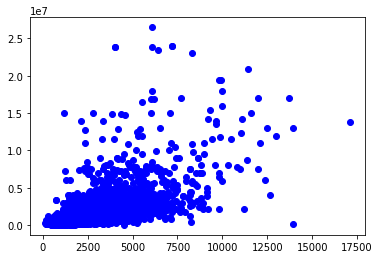

In [46]:
plt.scatter(X, y, c='blue')

plt.plot([x_min, x_max], [y_min, y_max], c='red')
fig.savefig('machine.jpg')